In [3]:
#import library

import numpy as np #linier algebra
import pandas as pd #data processig, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns #data vizualisation

#to set backend of matplotlib to inline view visaul
%matplotlib inline


In [4]:
df = pd.read_csv('G:\Kulian UIN\Intelijen Bisnis - Gunawan Budi Prasetyo\Materi\BreadBasket_DMS.csv')

In [5]:
#dataset overview
df.head(3)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [7]:
#Explore dataset
print("Number of unique item:", df.Item.nunique())

#or
len(df['Item'].unique())

Number of unique item: 95


95

In [8]:
#to get all distinct/unique values, you can use unique or drop_duplicates
df.Item.unique()
#df['Item'].unique()

df.Item.drop_duplicates()

0                                Bread
1                         Scandinavian
3                        Hot chocolate
4                                  Jam
5                              Cookies
6                               Muffin
7                               Coffee
8                               Pastry
10                           Medialuna
16                                 Tea
26                                NONE
29                             Tartine
32                              Basket
40                       Mineral water
46                          Farm House
60                               Fudge
84                               Juice
100             Ella's Kitchen Pouches
110                   Victorian Sponge
114                           Frittata
117                  Hearty & Seasonal
124                               Soup
132                 Pick and Mix Bowls
136                          Smoothies
139                               Cake
142                     M

In [9]:
#to get the total count of each unique value in a column
df.Item.value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

In [10]:
#from list of value_counts() above, take top 10 item using head()
topten = df.Item.value_counts()
topten.head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

In [11]:
#we can see that there's an item listed as 'NONE' and is counted 786
#lets drop/remove it first

df = df[df['Item'] != 'NONE']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


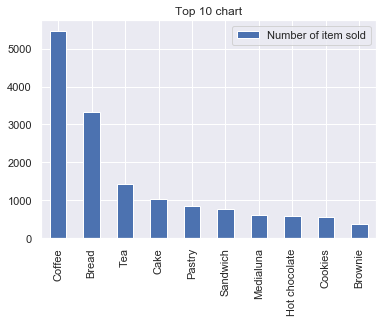

In [12]:
item_sales = df.Item.value_counts()
topten = item_sales[:10]
topten

#visualize it using chart
sns.set(style= 'darkgrid')
toptenbar = topten.plot.bar(title = 'Top 10 chart')
toptenbar.legend(['Number of item sold'])

In [13]:
coffeesales = df[df['Item'] == 'Coffee']
coffeesales.head(10)
#how is coffe sold during the day
coffeesales['Hour'] = df.Time.apply(lambda x: int(x.split(':')[0]))
coffeeTime = coffeesales['Hour'].value_counts()
coffeeTime = coffeesales['Hour'].value_counts().sort_index()
coffeesales.head()

C:\Users\adinu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Date,Time,Transaction,Item,Hour
7,2016-10-30,10:13:03,5,Coffee,10
15,2016-10-30,10:19:12,7,Coffee,10
28,2016-10-30,10:30:14,12,Coffee,10
34,2016-10-30,10:31:24,13,Coffee,10
44,2016-10-30,10:37:08,16,Coffee,10


Text(0, 0.5, 'Number of coffee sold')

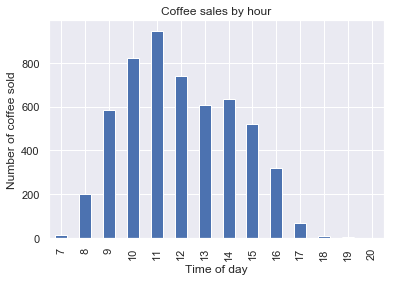

In [14]:
#visualiza coffee sales using chart
sns.set(style= 'darkgrid')
coffeetimebar = coffeeTime.plot.bar(title = 'Coffee sales by hour')
coffeetimebar.set_xlabel('Time of day')
coffeetimebar.set_ylabel('Number of coffee sold')